In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] == 300

False

In [6]:
df_py312 = pd.read_json('result_312.txt')
df_py313 = pd.read_json('result_313.txt')

In [8]:
df_py312

,num_threads,test_type,duration
0,1,Thread Creation,NaN
1,1,CPU-bound,0.004984
2,1,I/O-bound,0.500950
3,1,Mixed Task,0.203266
4,2,Thread Creation,NaN
5,2,CPU-bound,0.009999
6,2,I/O-bound,0.501416
7,2,Mixed Task,0.203352
8,4,Thread Creation,NaN
9,4,CPU-bound,0.021904


In [9]:
df_py313

,num_threads,test_type,duration
0,1,Thread Creation,NaN
1,1,CPU-bound,0.006840
2,1,I/O-bound,0.501028
3,1,Mixed Task,0.203343
4,2,Thread Creation,NaN
5,2,CPU-bound,0.009836
6,2,I/O-bound,0.501161
7,2,Mixed Task,0.204588
8,4,Thread Creation,NaN
9,4,CPU-bound,0.022117


In [10]:
df_py312["version"] = "Python 3.12"
df_py313["version"] = "Python 3.13"

In [12]:
df_py312.head()

,num_threads,test_type,duration,version
0,1,Thread Creation,NaN,Python 3.12
1,1,CPU-bound,0.004984,Python 3.12
2,1,I/O-bound,0.500950,Python 3.12
3,1,Mixed Task,0.203266,Python 3.12
4,2,Thread Creation,NaN,Python 3.12


In [13]:
df_combined = pd.concat([df_py312, df_py313])

In [16]:
df_combined.sample(10)

,num_threads,test_type,duration,version
18,16,I/O-bound,0.507066,Python 3.12
5,2,CPU-bound,0.009836,Python 3.13
21,32,CPU-bound,0.203341,Python 3.13
6,2,I/O-bound,0.501161,Python 3.13
4,2,Thread Creation,NaN,Python 3.12
25,64,CPU-bound,0.312810,Python 3.12
19,16,Mixed Task,0.223545,Python 3.13
23,32,Mixed Task,0.232793,Python 3.12
7,2,Mixed Task,0.204588,Python 3.13
8,4,Thread Creation,NaN,Python 3.13


<Figure size 1000x600 with 0 Axes>

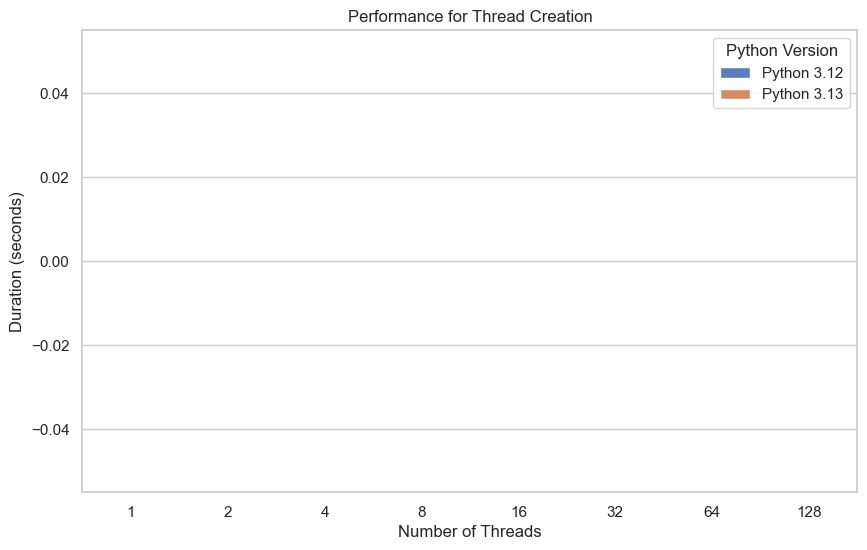

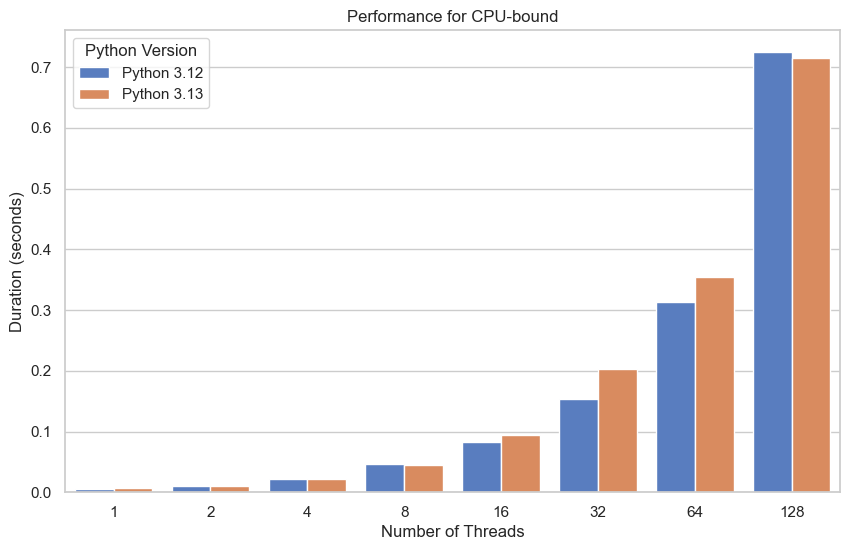

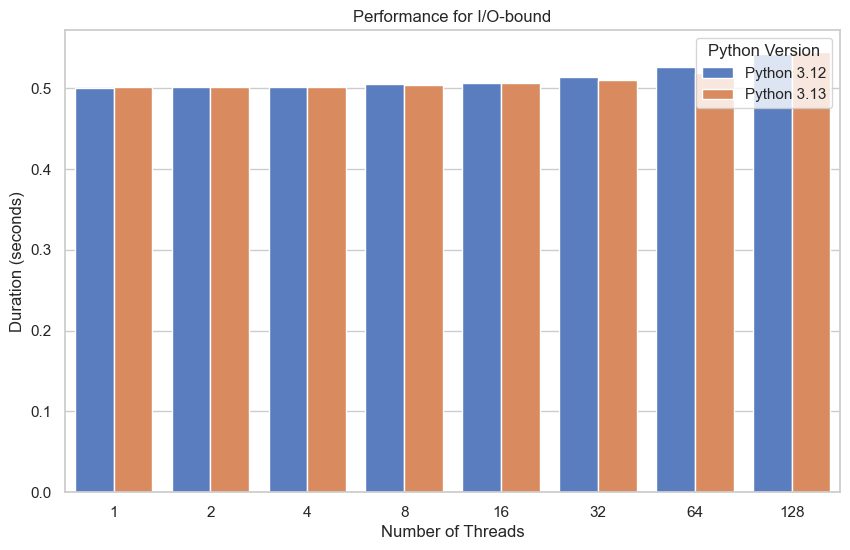

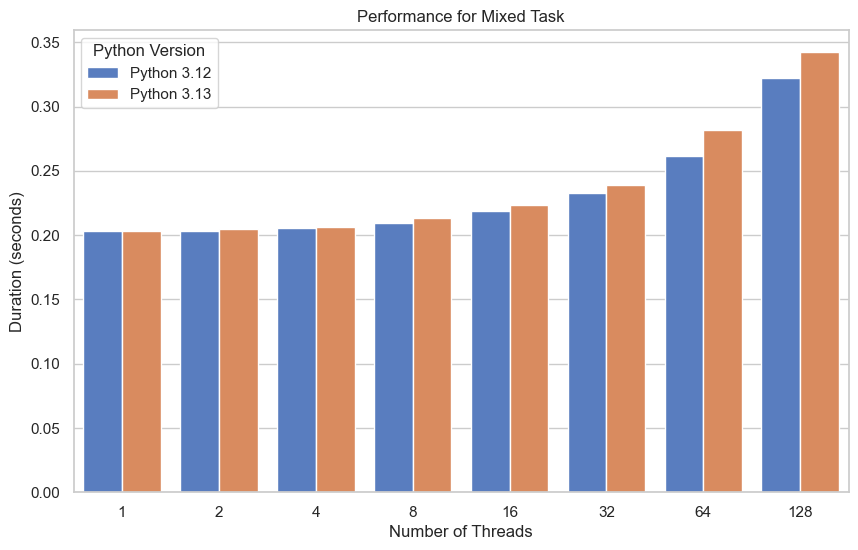

In [25]:
plt.figure(figsize=(10, 6))
test_types = df_combined['test_type'].unique()

for test in test_types:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x="num_threads", 
        y="duration", 
        hue="version", 
        data=df_combined[df_combined['test_type'] == test], 
        palette="muted", 
        errorbar=None
    )
    plt.title(f"Performance for {test}")
    plt.xlabel("Number of Threads")
    plt.ylabel("Duration (seconds)")
    plt.legend(title='Python Version')
    plt.show()

c:\Users\sayyed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\sayyed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


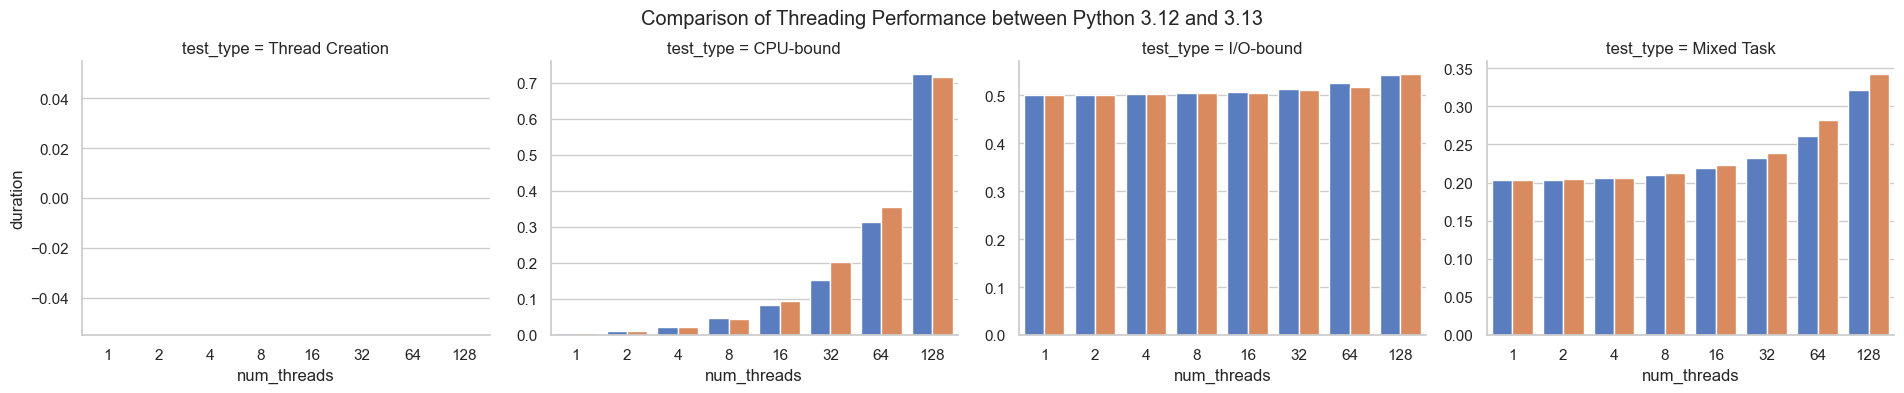

In [27]:
g = sns.FacetGrid(
    df_combined, 
    col="test_type", 
    height=4, 
    aspect=1.2, 
    sharey=False
)

g.map(
    sns.barplot, 
    "num_threads", 
    "duration", 
    "version", 
    palette="muted", 
    errorbar=None)

plt.suptitle("Comparison of Threading Performance between Python 3.12 and 3.13")
plt.subplots_adjust(top=0.85)
plt.show()